In [1]:
from utils import *
import os

In [2]:
# Path to subjects' data
subjects_path = "subjects"
n_subjects = len(os.listdir(subjects_path)) -1  # Get the number of subjects
print(f'There are {n_subjects} subjects.')
files = [f for f in os.listdir('subjects') if os.path.isfile(os.path.join('subjects', f))]
print(files) #there is one extra file in the directory....

There are 27 subjects.
['.DS_Store']


In [3]:
# Initialize data storage
all_datasets = []
all_labels = []
subject_ids = []

# Define feature functions
feature_functions = [
    mean_absolute_value,  
    root_mean_square,     
    waveform_length,      
    slope_sign_changes,   
    variance,             
    mean_frequency,       
    maximum_amplitude     
]

# Path to subjects' data
subjects_path = "subjects"
n_subjects = len(os.listdir(subjects_path)) -1  # Get the number of subjects

# Loop through each subject
for subject_idx in range(n_subjects):
    print(f"Processing Subject {subject_idx + 1}/{n_subjects}...")

    # Load subject data
    subject_file = f"{subjects_path}/s{subject_idx + 1}/S{subject_idx + 1}_A1_E1.mat"
    data = loadmat(subject_file)
    
    # Extract data
    emg = data["emg"]
    emg_rectified = np.abs(emg)  # Rectify EMG signals
    stimulus = data["restimulus"].flatten()
    repetition = data["rerepetition"].flatten()

    # Step 1: Pre-process EMG to calculate envelopes
    emg_envelopes = emg_envelope(emg_rectified, stimulus, repetition)

    # Step 2: Calculate average activations
    emg_average_activations = compute_emg_average_activations(emg_envelopes)

    # Step 3: Identify trials to exclude
    exclude_list = trial_to_exclude_all(
        emg_average_activations,
        threshold_factor=1.5,
        use_iqr=True
    )

    # Step 4: Build the dataset for the subject
    dataset, labels = build_dataset_from_ninapro(
        emg_envelopes,
        features=feature_functions,
        exclude_list=exclude_list
    )

    # Store the dataset and labels
    all_datasets.append(dataset)
    all_labels.append(labels)
    subject_ids.extend([subject_idx + 1] * len(labels))  # Add the subject ID for each row


# Combine datasets and labels if desired
combined_dataset = np.vstack(all_datasets)
combined_labels = np.hstack(all_labels)
final_subject_ids = np.array(subject_ids)


print("Data processing completed for all subjects.")
# Check the shapes
print(f"Dataset shape: {combined_dataset.shape}")
print(f"Labels shape: {combined_labels.shape}")
print(f"Subject IDs shape: {final_subject_ids.shape}")


Processing Subject 1/27...
Processing Subject 2/27...
Processing Subject 3/27...
Processing Subject 4/27...
Processing Subject 5/27...
Processing Subject 6/27...
Processing Subject 7/27...
Processing Subject 8/27...
Processing Subject 9/27...
Processing Subject 10/27...
Processing Subject 11/27...
Processing Subject 12/27...
Processing Subject 13/27...
Processing Subject 14/27...
Processing Subject 15/27...
Processing Subject 16/27...
Processing Subject 17/27...
Processing Subject 18/27...
Processing Subject 19/27...
Processing Subject 20/27...
Processing Subject 21/27...
Processing Subject 22/27...
Processing Subject 23/27...
Processing Subject 24/27...
Processing Subject 25/27...
Processing Subject 26/27...
Processing Subject 27/27...
Data processing completed for all subjects.
Dataset shape: (3067, 70)
Labels shape: (3067,)
Subject IDs shape: (3067,)


### Question 2
features - Are there any similarity/discrepancies between the subjects?

/Users/saracruz/Desktop/NSSP/Project2/utils.py:346: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


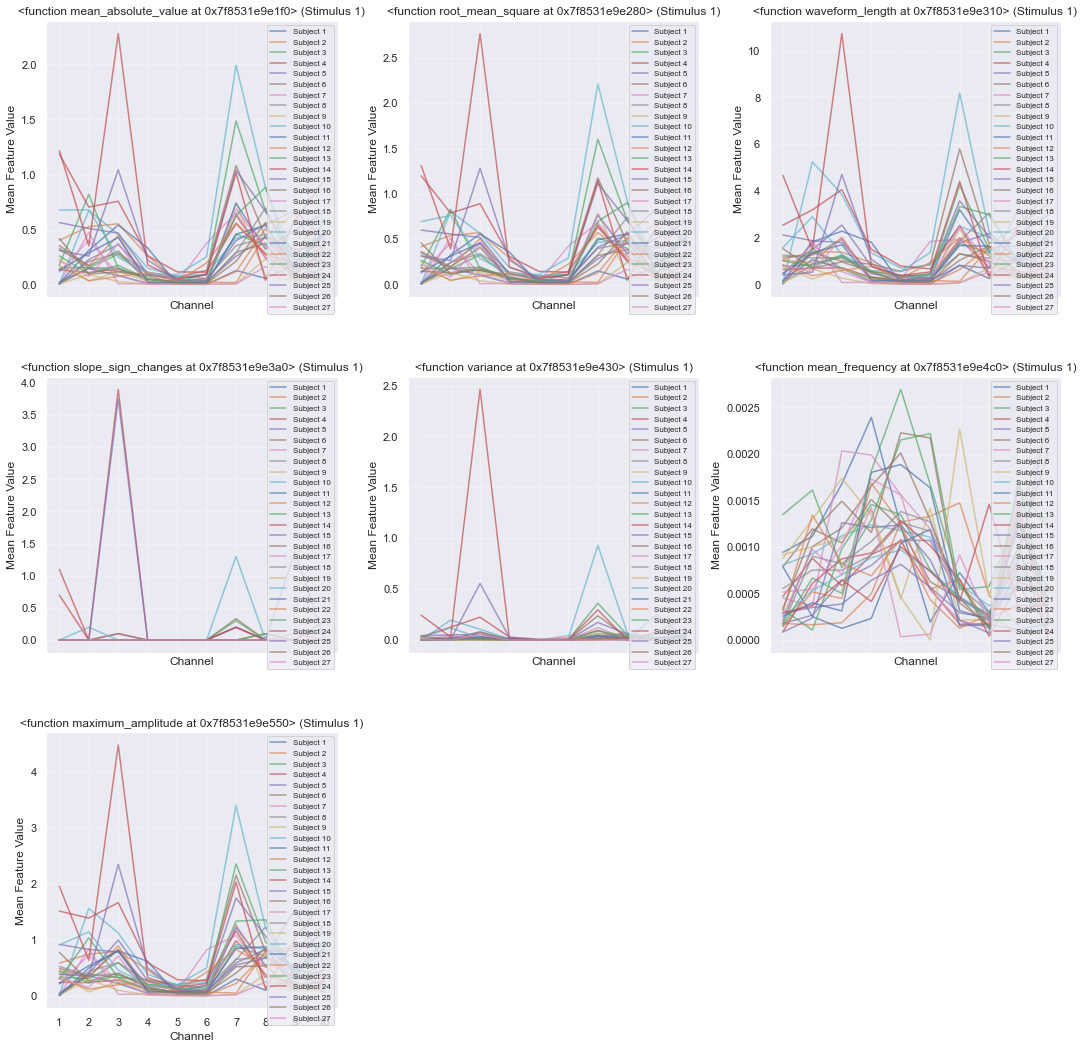

/Users/saracruz/Desktop/NSSP/Project2/utils.py:346: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


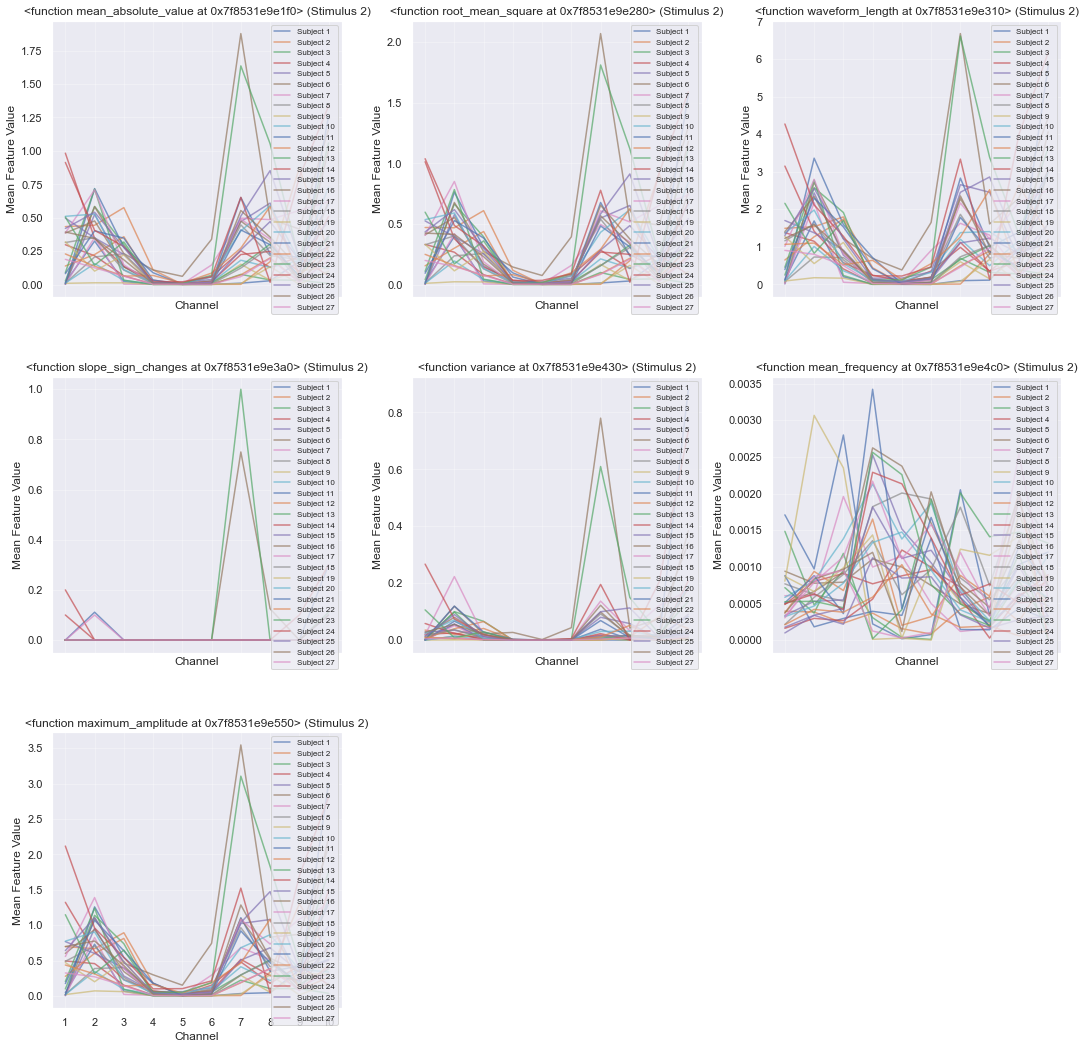

/Users/saracruz/Desktop/NSSP/Project2/utils.py:346: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


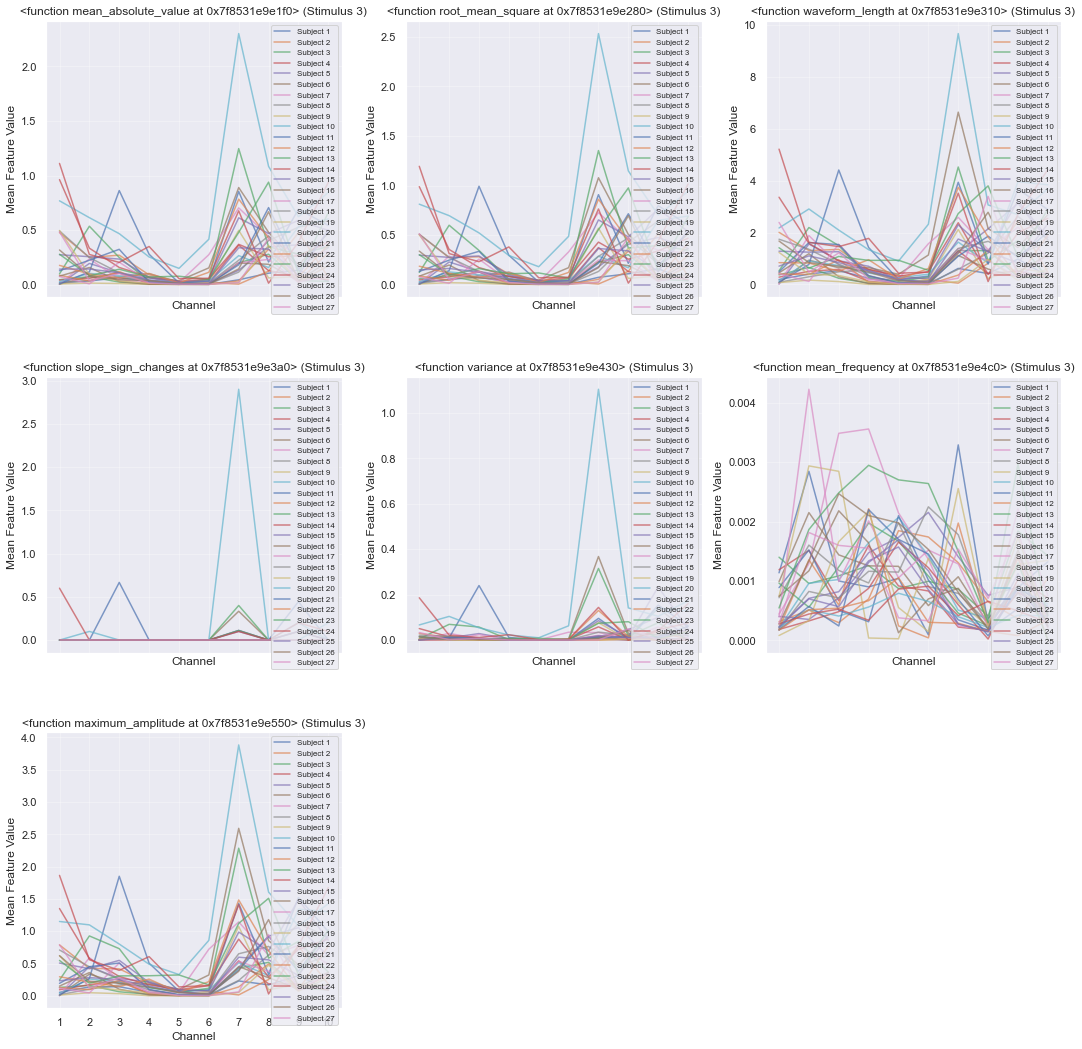

/Users/saracruz/Desktop/NSSP/Project2/utils.py:346: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


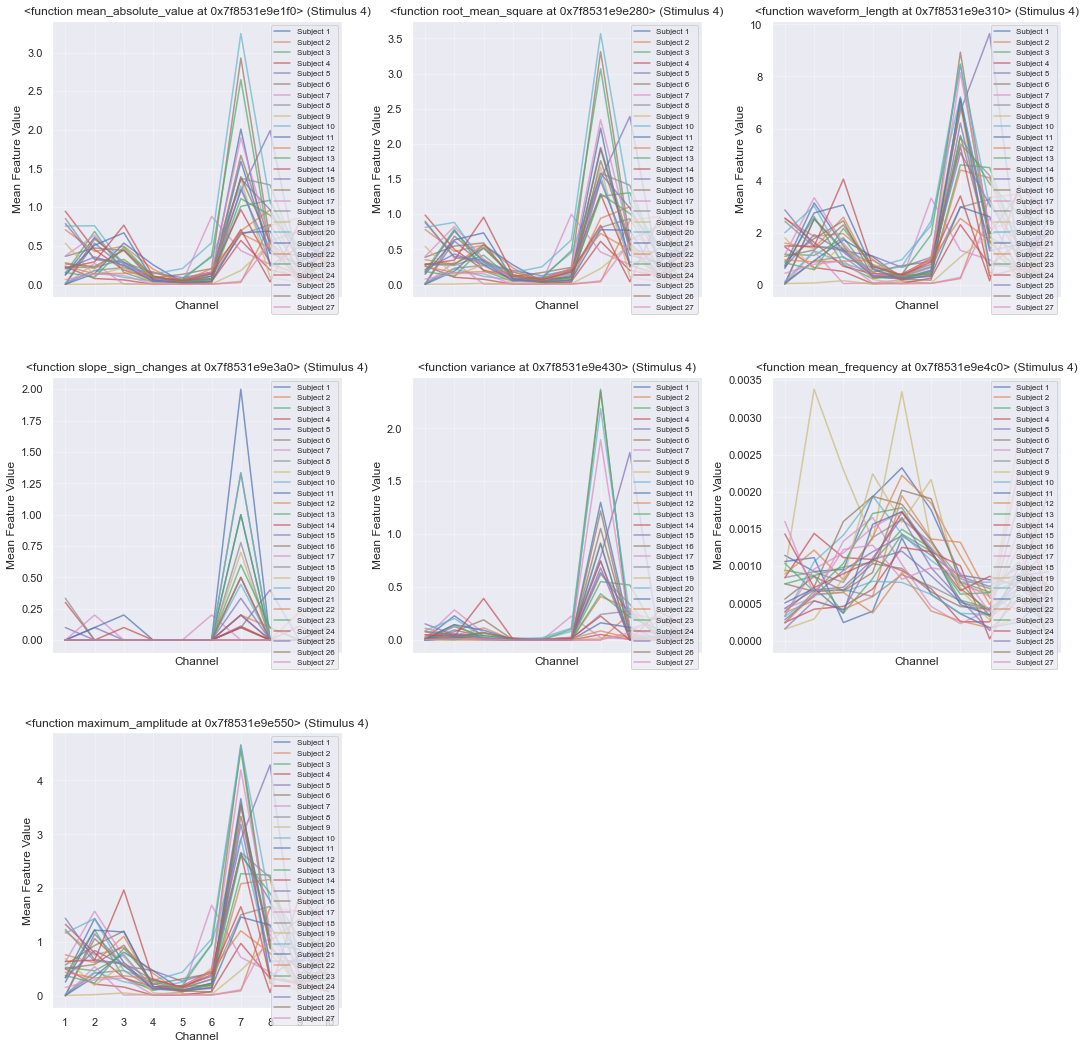

/Users/saracruz/Desktop/NSSP/Project2/utils.py:346: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


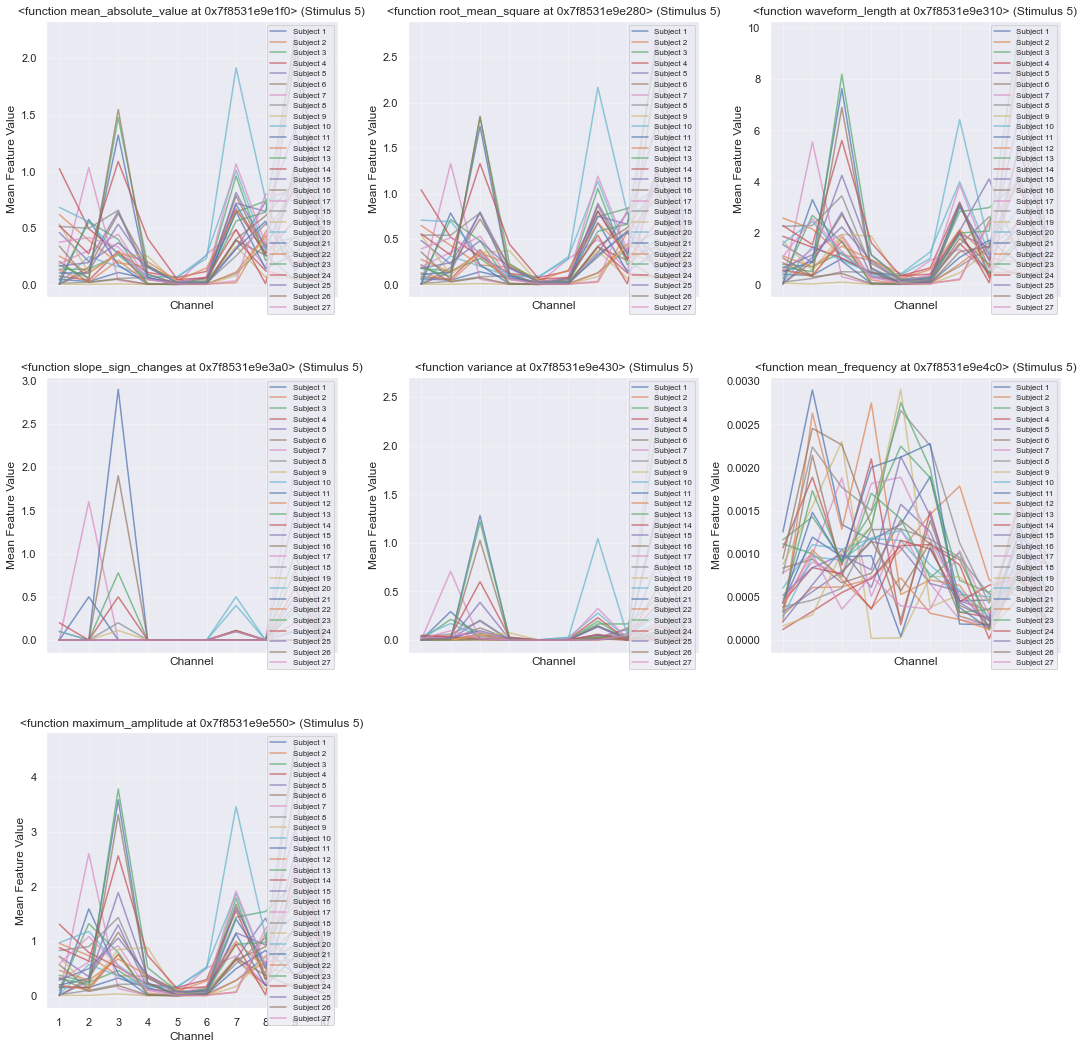

/Users/saracruz/Desktop/NSSP/Project2/utils.py:346: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


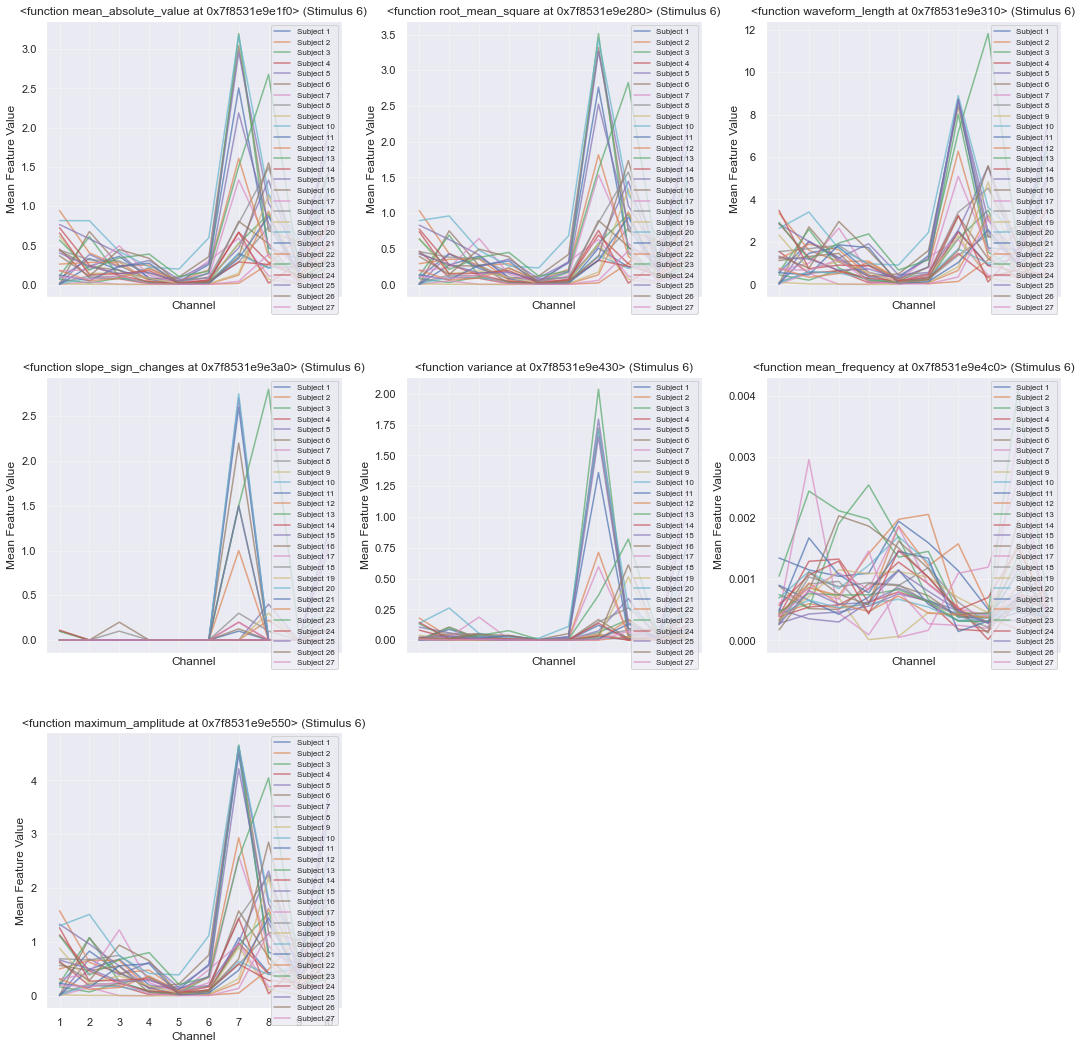

/Users/saracruz/Desktop/NSSP/Project2/utils.py:346: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


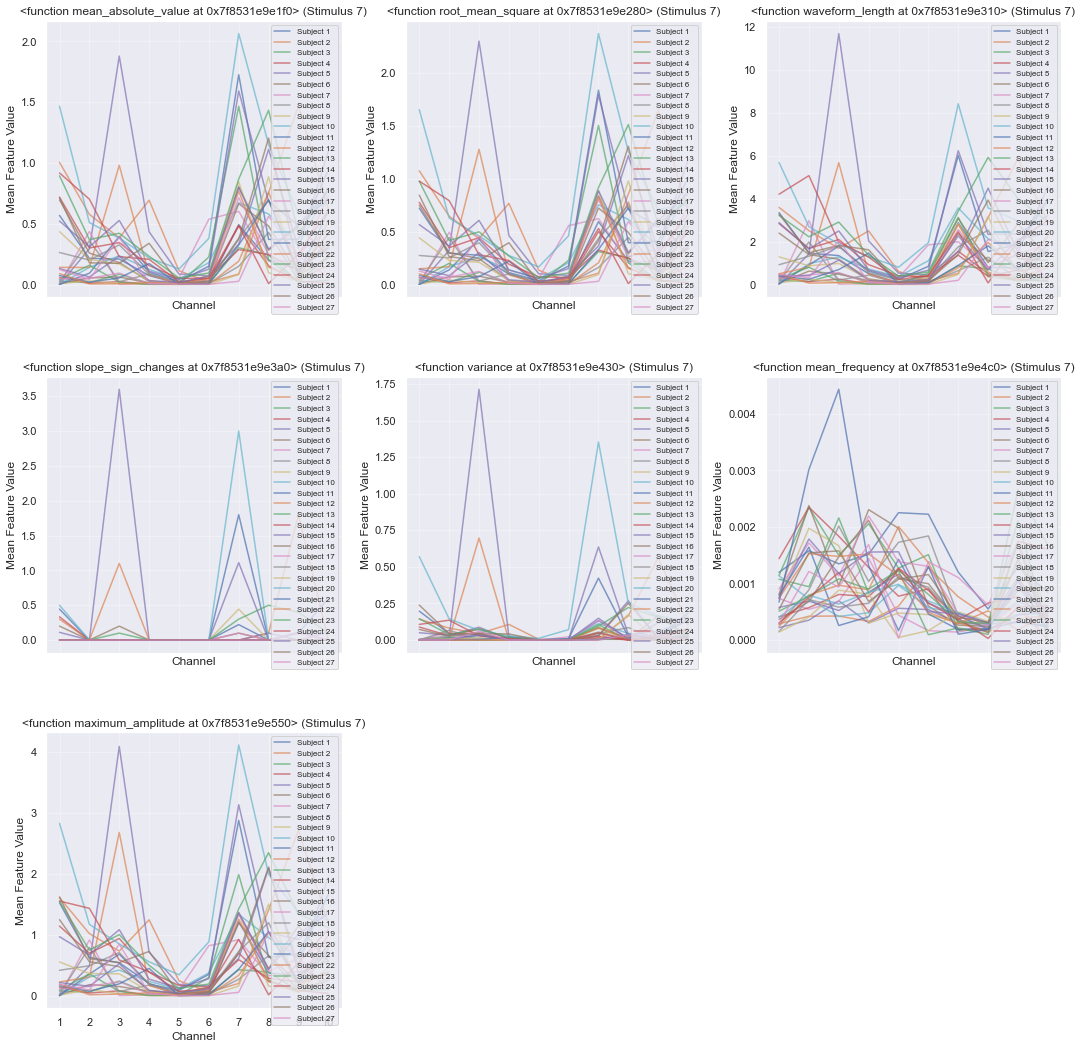

/Users/saracruz/Desktop/NSSP/Project2/utils.py:346: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


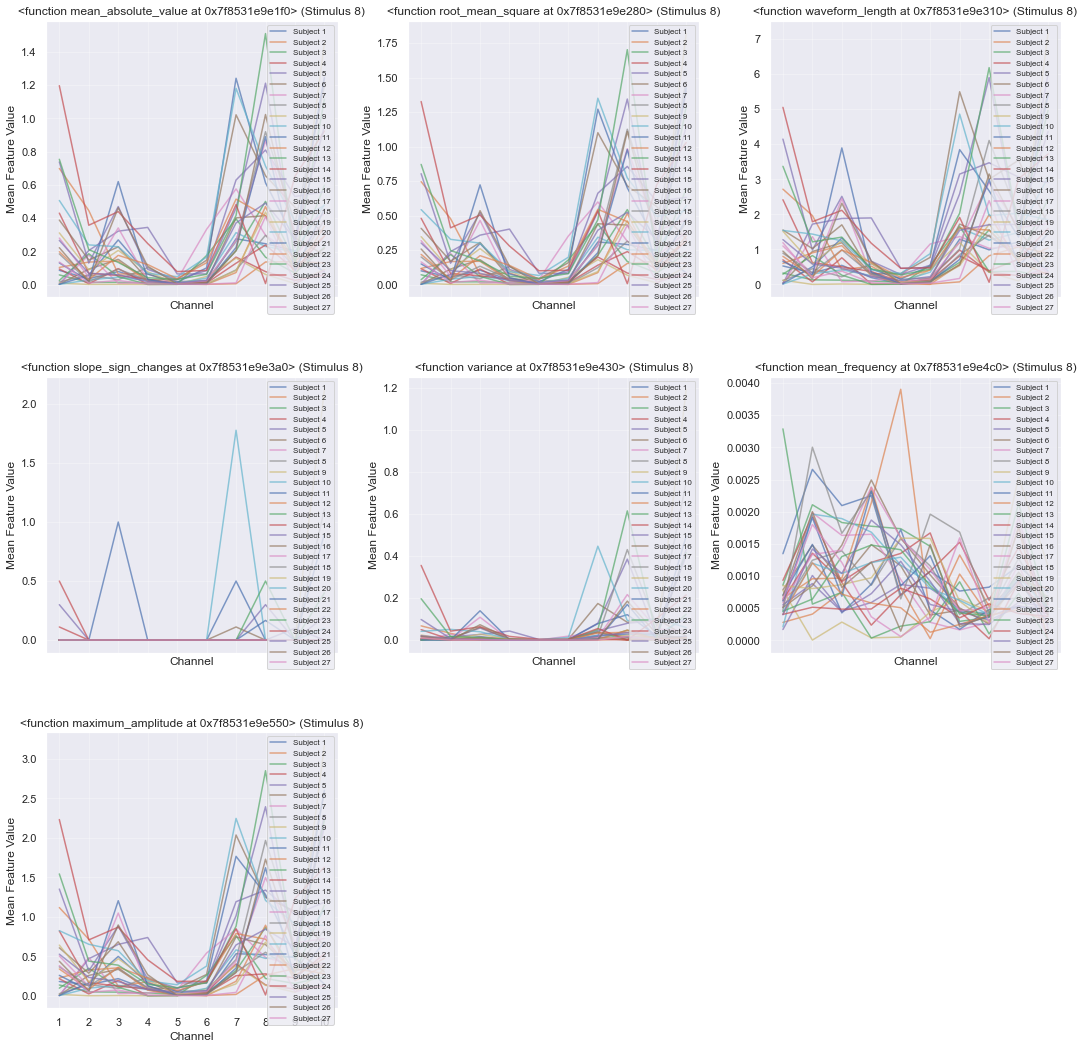

/Users/saracruz/Desktop/NSSP/Project2/utils.py:346: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


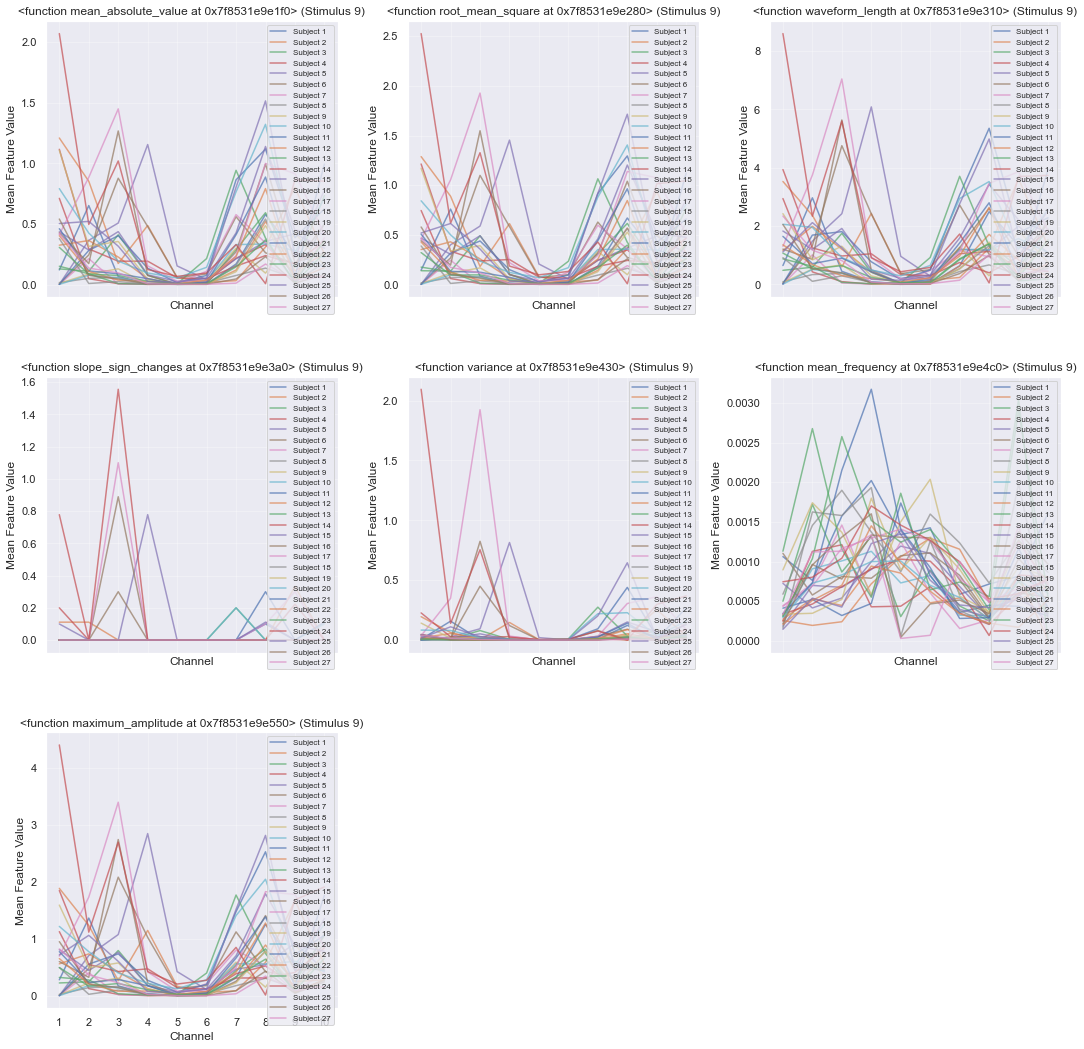

/Users/saracruz/Desktop/NSSP/Project2/utils.py:346: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


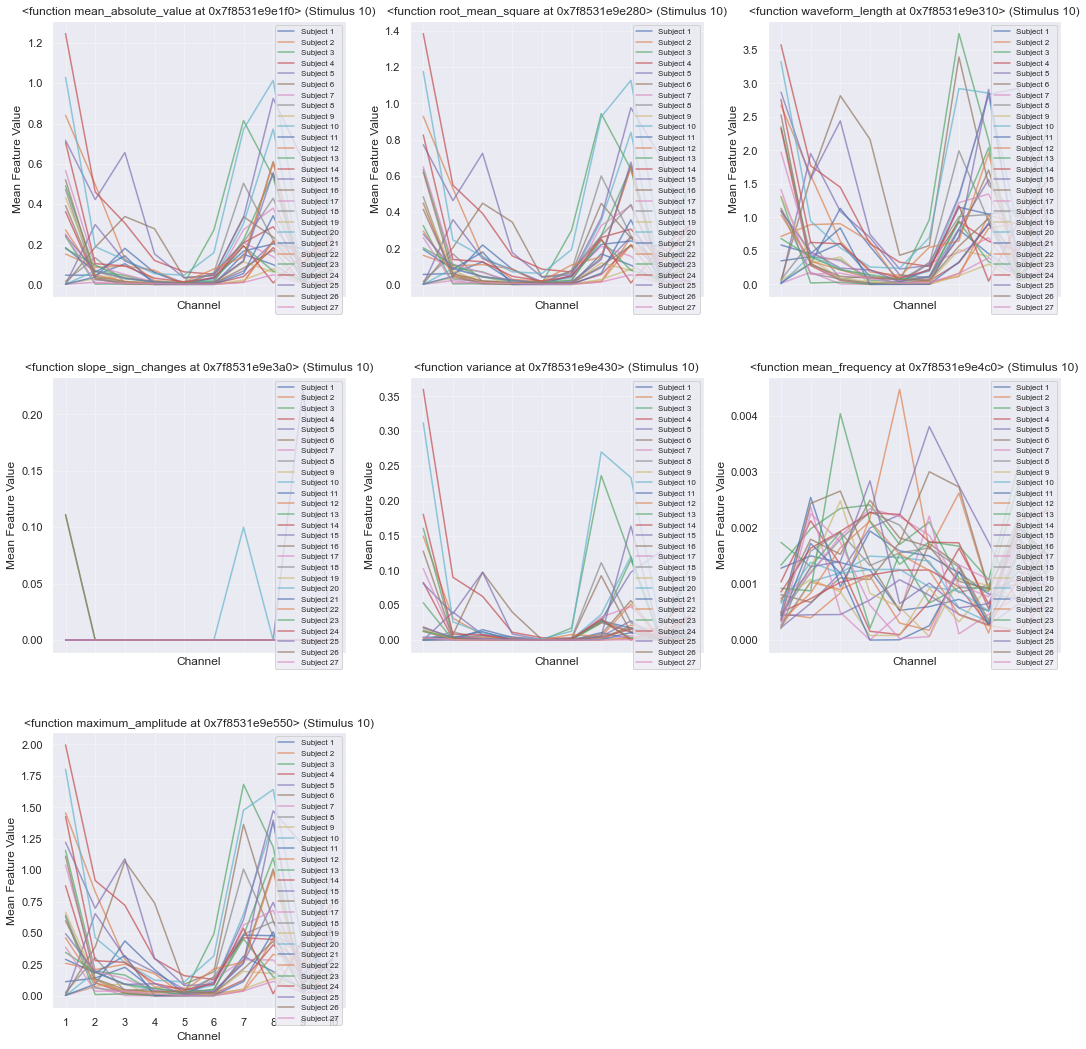

/Users/saracruz/Desktop/NSSP/Project2/utils.py:346: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


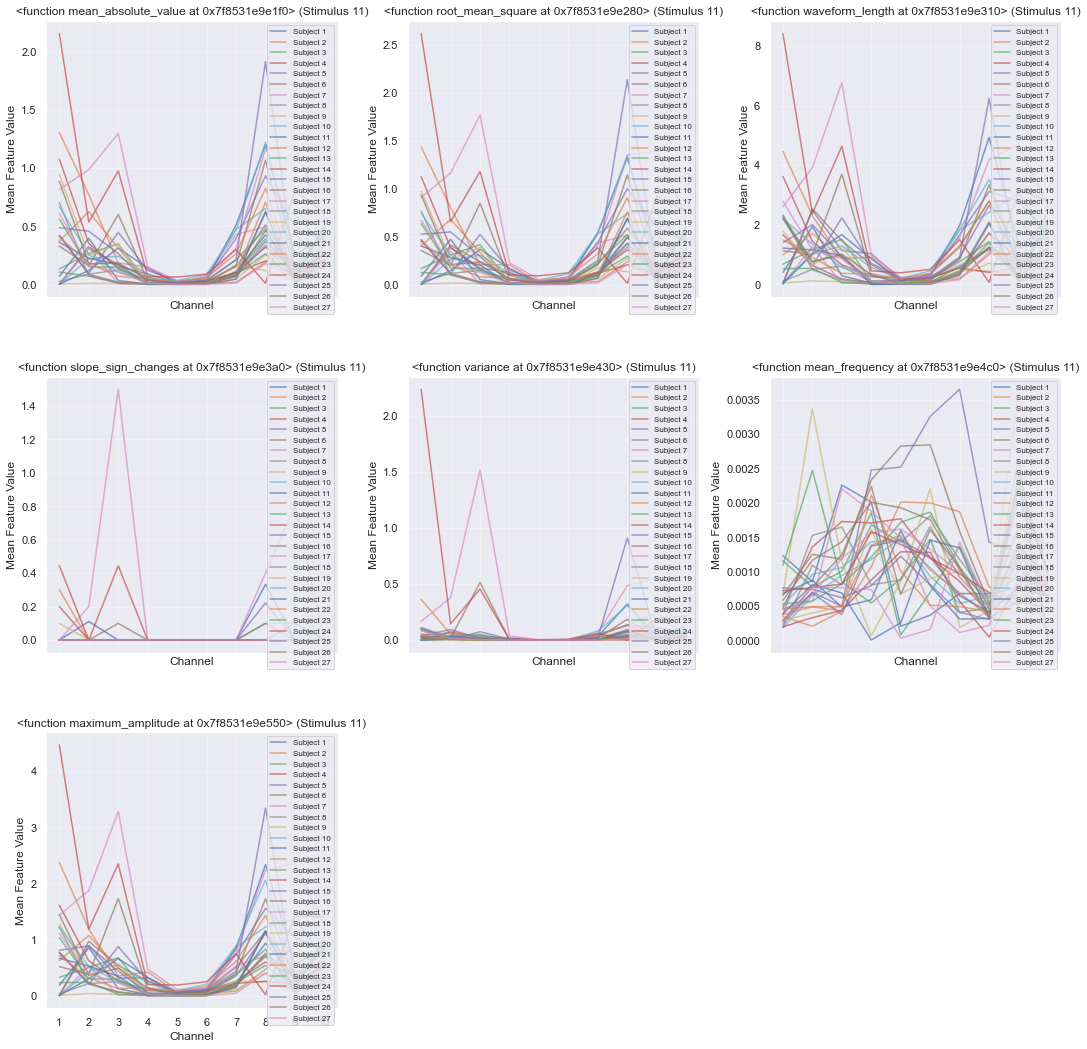

/Users/saracruz/Desktop/NSSP/Project2/utils.py:346: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


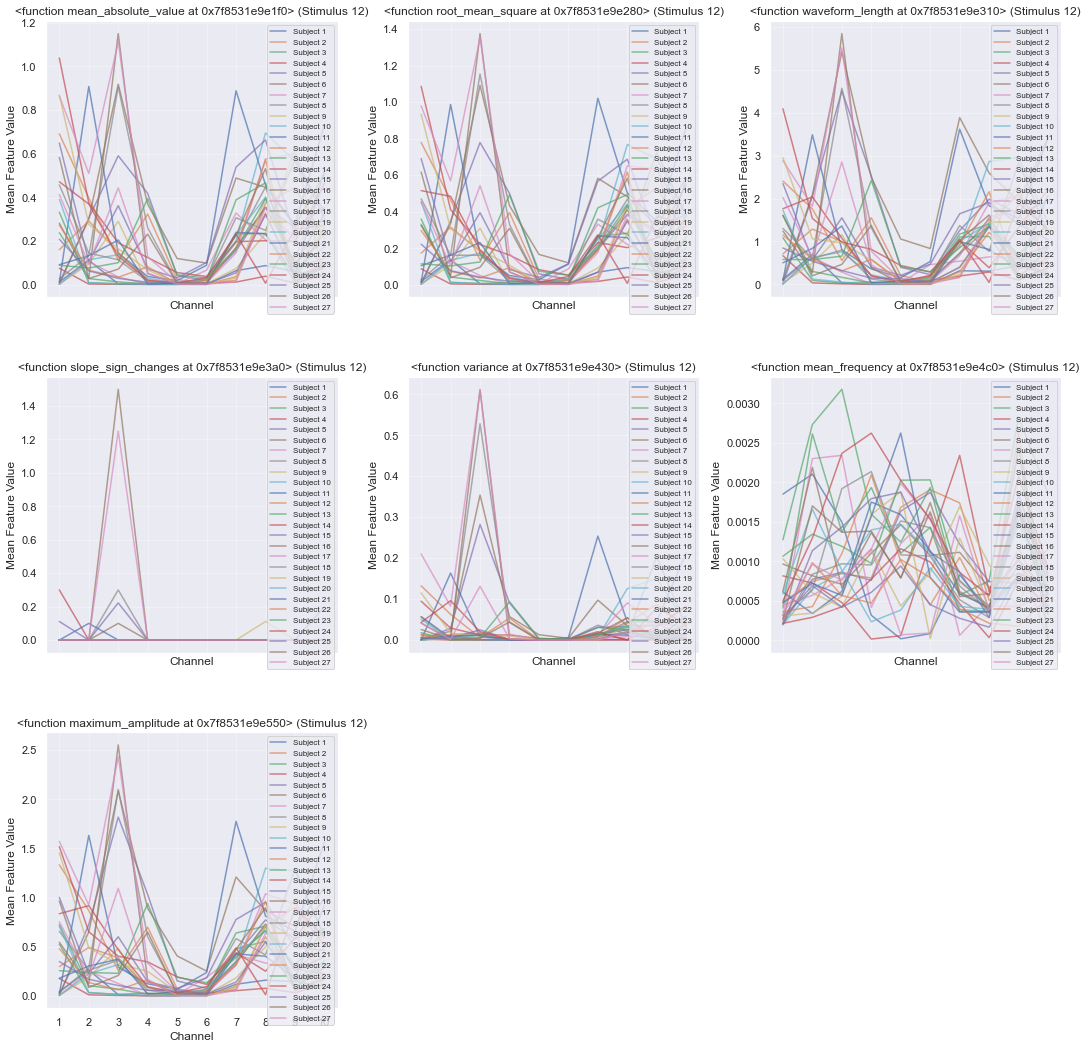

In [4]:
plot_feature_subjects(
    combined_dataset,
    combined_labels,
    final_subject_ids,
    n_stimuli=12,
    n_channels=10,
    feature_names=feature_functions
)
